# Enhancing E-Commerce Strategies Through Customer Behavior Analysis
<span style="font-size:20px;"> - Amisha Kelkar, Arundhati (Ari) Kolahal, Chaitali Deshmukh, Neha Shastri

## Exporatory Data Analysis (EDA)

### Importing relevant libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Dataset

In [ ]:
events = pd.read_csv('events.csv')
events.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686546 entries, 0 to 1686545
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   timestamp      1686546 non-null  int64  
 1   visitorid      1686545 non-null  float64
 2   event          1686545 non-null  object 
 3   itemid         1686545 non-null  float64
 4   transactionid  13796 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 64.3+ MB


In [ ]:
users=pd.read_parquet('users.parquet')
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407580 entries, 0 to 1407579
Data columns (total 8 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   visitorid                      1407580 non-null  int64  
 1   total_addtocart                1407580 non-null  int64  
 2   total_transaction              1407580 non-null  int64  
 3   total_view                     1407580 non-null  int64  
 4   unique_items                   1407580 non-null  int64  
 5   avg_interactions_per_week      1407580 non-null  float64
 6   p_addtocart_given_view         1407580 non-null  float64
 7   p_transaction_given_addtocart  1407580 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 85.9 MB


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis was undertaken for both dataframes, the original one and the one creaed with additional features:
1. events
2. users

#### Events

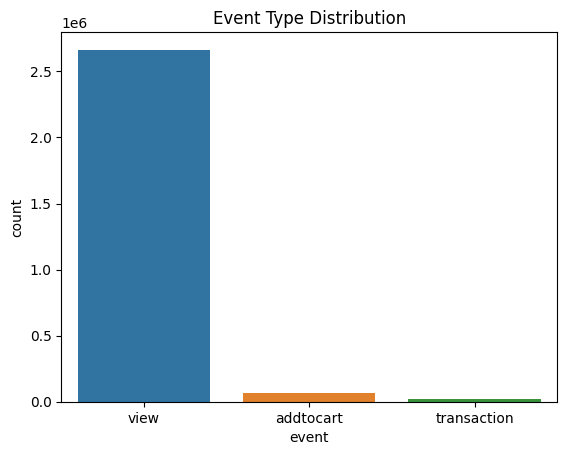

In [ ]:
sns.countplot(x=events['event'])
plt.title("Event Type Distribution")
plt.show()

**Distribution of User Events**<br>
The plot illustrates the distribution of user interactions on the platform, highlighting that the majority of events are product views, followed by a significantly smaller number of add-to-cart actions and transactions. This suggests a high browsing activity but a relatively low conversion rate

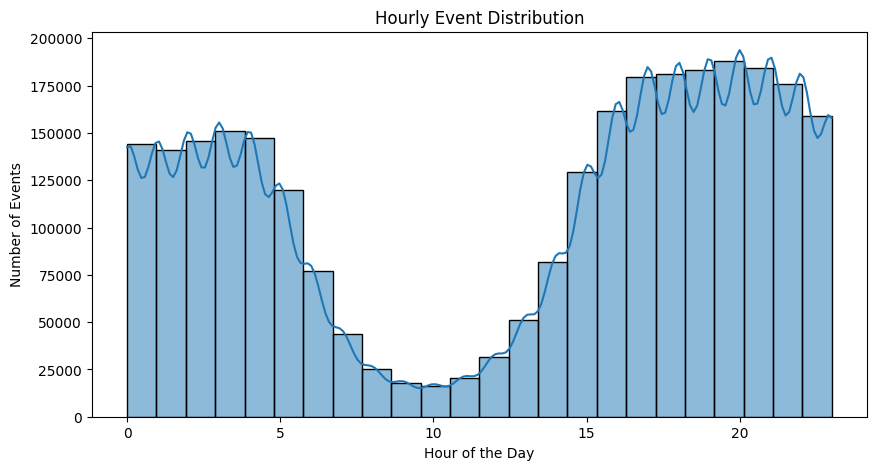

In [ ]:
df = events.copy()
df['hour'] = events['timestamp'].dt.hour
df['day'] = events['timestamp'].dt.date

# Plot activity per hour
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Hourly Event Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.show()

**Hourly Distribution of User Events**<br>
The graph shows the distribution of user events throughout the day, revealing two peak activity periods—one in the early hours (midnight to 5 AM) and another in the evening (around 4 PM to midnight). A noticeable drop in activity is observed between 6 AM and 2 PM, suggesting lower engagement during daytime hours.

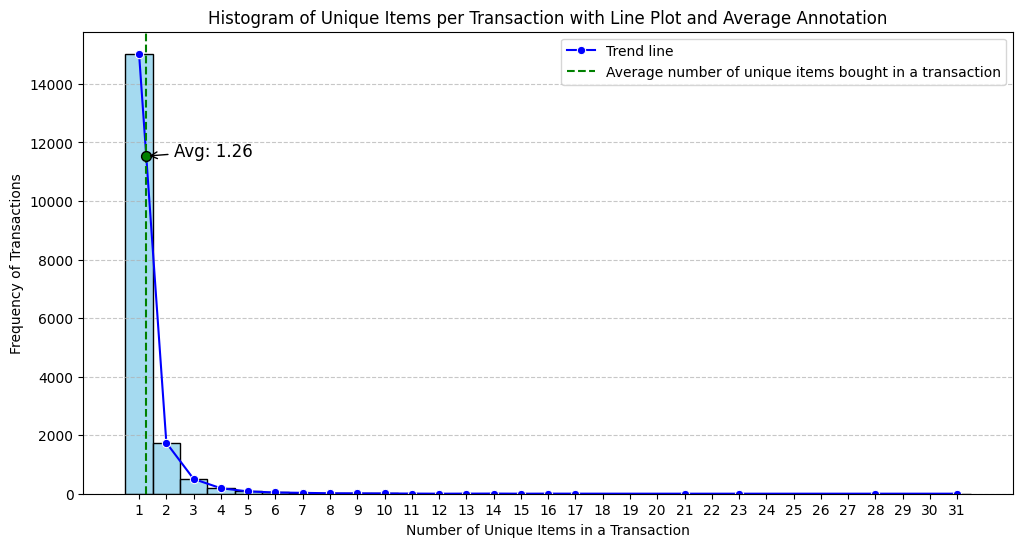

In [ ]:
# Calculate the number of unique items per transaction
unique_items_per_transaction = events.groupby('transactionid')['itemid'].nunique()

# Count frequency of each unique item count
freq_counts = unique_items_per_transaction.value_counts().sort_index()

# Calculate average number of unique items per transaction
avg_unique_items = unique_items_per_transaction.mean()

# Create the plot
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(unique_items_per_transaction, bins=range(1, unique_items_per_transaction.max() + 2),
             kde=False, color='skyblue', discrete=True)

# Line plot overlay
sns.lineplot(x=freq_counts.index, y=freq_counts.values, marker='o', color='blue', label="Trend line")

# Highlight average with a vertical line
plt.axvline(avg_unique_items, color='green', linestyle='--', label='Average number of unique items bought in a transaction')

# Find corresponding y-value for annotation
avg_y_value = np.interp(avg_unique_items, freq_counts.index, freq_counts.values)

# Annotate the average point with an arrow
plt.scatter(avg_unique_items, avg_y_value, color='green', s=50, edgecolors='black', zorder=3)  # Smaller point
plt.annotate(f'Avg: {avg_unique_items:.2f}',
             xy=(avg_unique_items, avg_y_value),
             xytext=(avg_unique_items + 1, avg_y_value + 5),  # Offset text
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             fontsize=12, color='black')

# Labels and title
plt.xlabel("Number of Unique Items in a Transaction")
plt.ylabel("Frequency of Transactions")
plt.title("Histogram of Unique Items per Transaction with Line Plot and Average Annotation")
plt.xticks(ticks=range(1, unique_items_per_transaction.max() + 1))  # Show all numbers on x-axis
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Distribution of Unique Items per Transaction**<br>
The histogram visualizes the distribution of unique items purchased per transaction, showing that most transactions contain only one or two items, with the frequency rapidly declining as the number of unique items increases. The average number of unique items per transaction is 1.26, as indicated by the vertical dashed green line

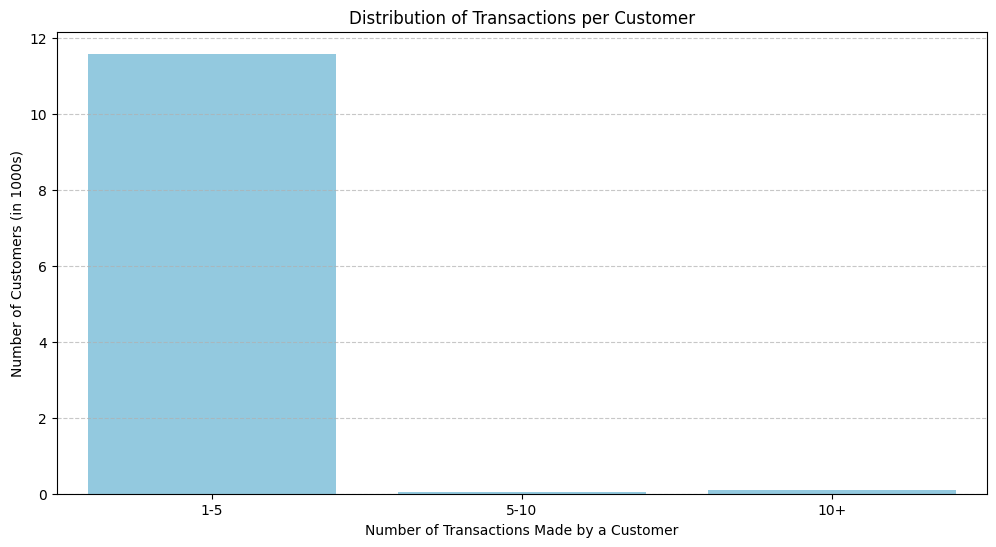

In [ ]:
# Step 1: Calculate the number of transactions made by each customer
transactions_per_visitor = events.groupby('visitorid')['transactionid'].nunique()

# Step 2: Categorize the transactions into specific bins
def categorize_transactions(num):
    if num >= 10:
        return '10+'
    elif num >= 5:
        return '5-10'
    elif num >= 1:
        return '1-5'

# Apply the categorization
transaction_range = transactions_per_visitor.apply(categorize_transactions)

# Step 3: Count the number of customers in each transaction category
transaction_counts = transaction_range.value_counts().reindex(['1-5', '5-10', '10+'])

# Step 4: Plot the data
plt.figure(figsize=(12, 6))

# Bar chart for the number of customers in each transaction category
sns.barplot(x=transaction_counts.index,
            y=transaction_counts.values / 1000,  # Convert number of customers to thousands
            color='skyblue')

# Add labels and title
plt.xlabel("Number of Transactions Made by a Customer")
plt.ylabel("Number of Customers (in 1000s)")
plt.title("Distribution of Transactions per Customer")

# Show the legend and grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Distribution of Transactions per Customer**<br>
The bar chart illustrates the distribution of customers based on the number of transactions they have made, showing that the majority of customers (nearly 12,000 in thousands) fall into the 1-5 transactions category. Very few customers make more than 5 transactions, indicating that repeat purchases are relatively rare.

In [ ]:
print(transactions_per_visitor.describe())

count    1.407580e+06
mean     1.255488e-02
std      6.839843e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.020000e+02
Name: transactionid, dtype: float64


#### Users

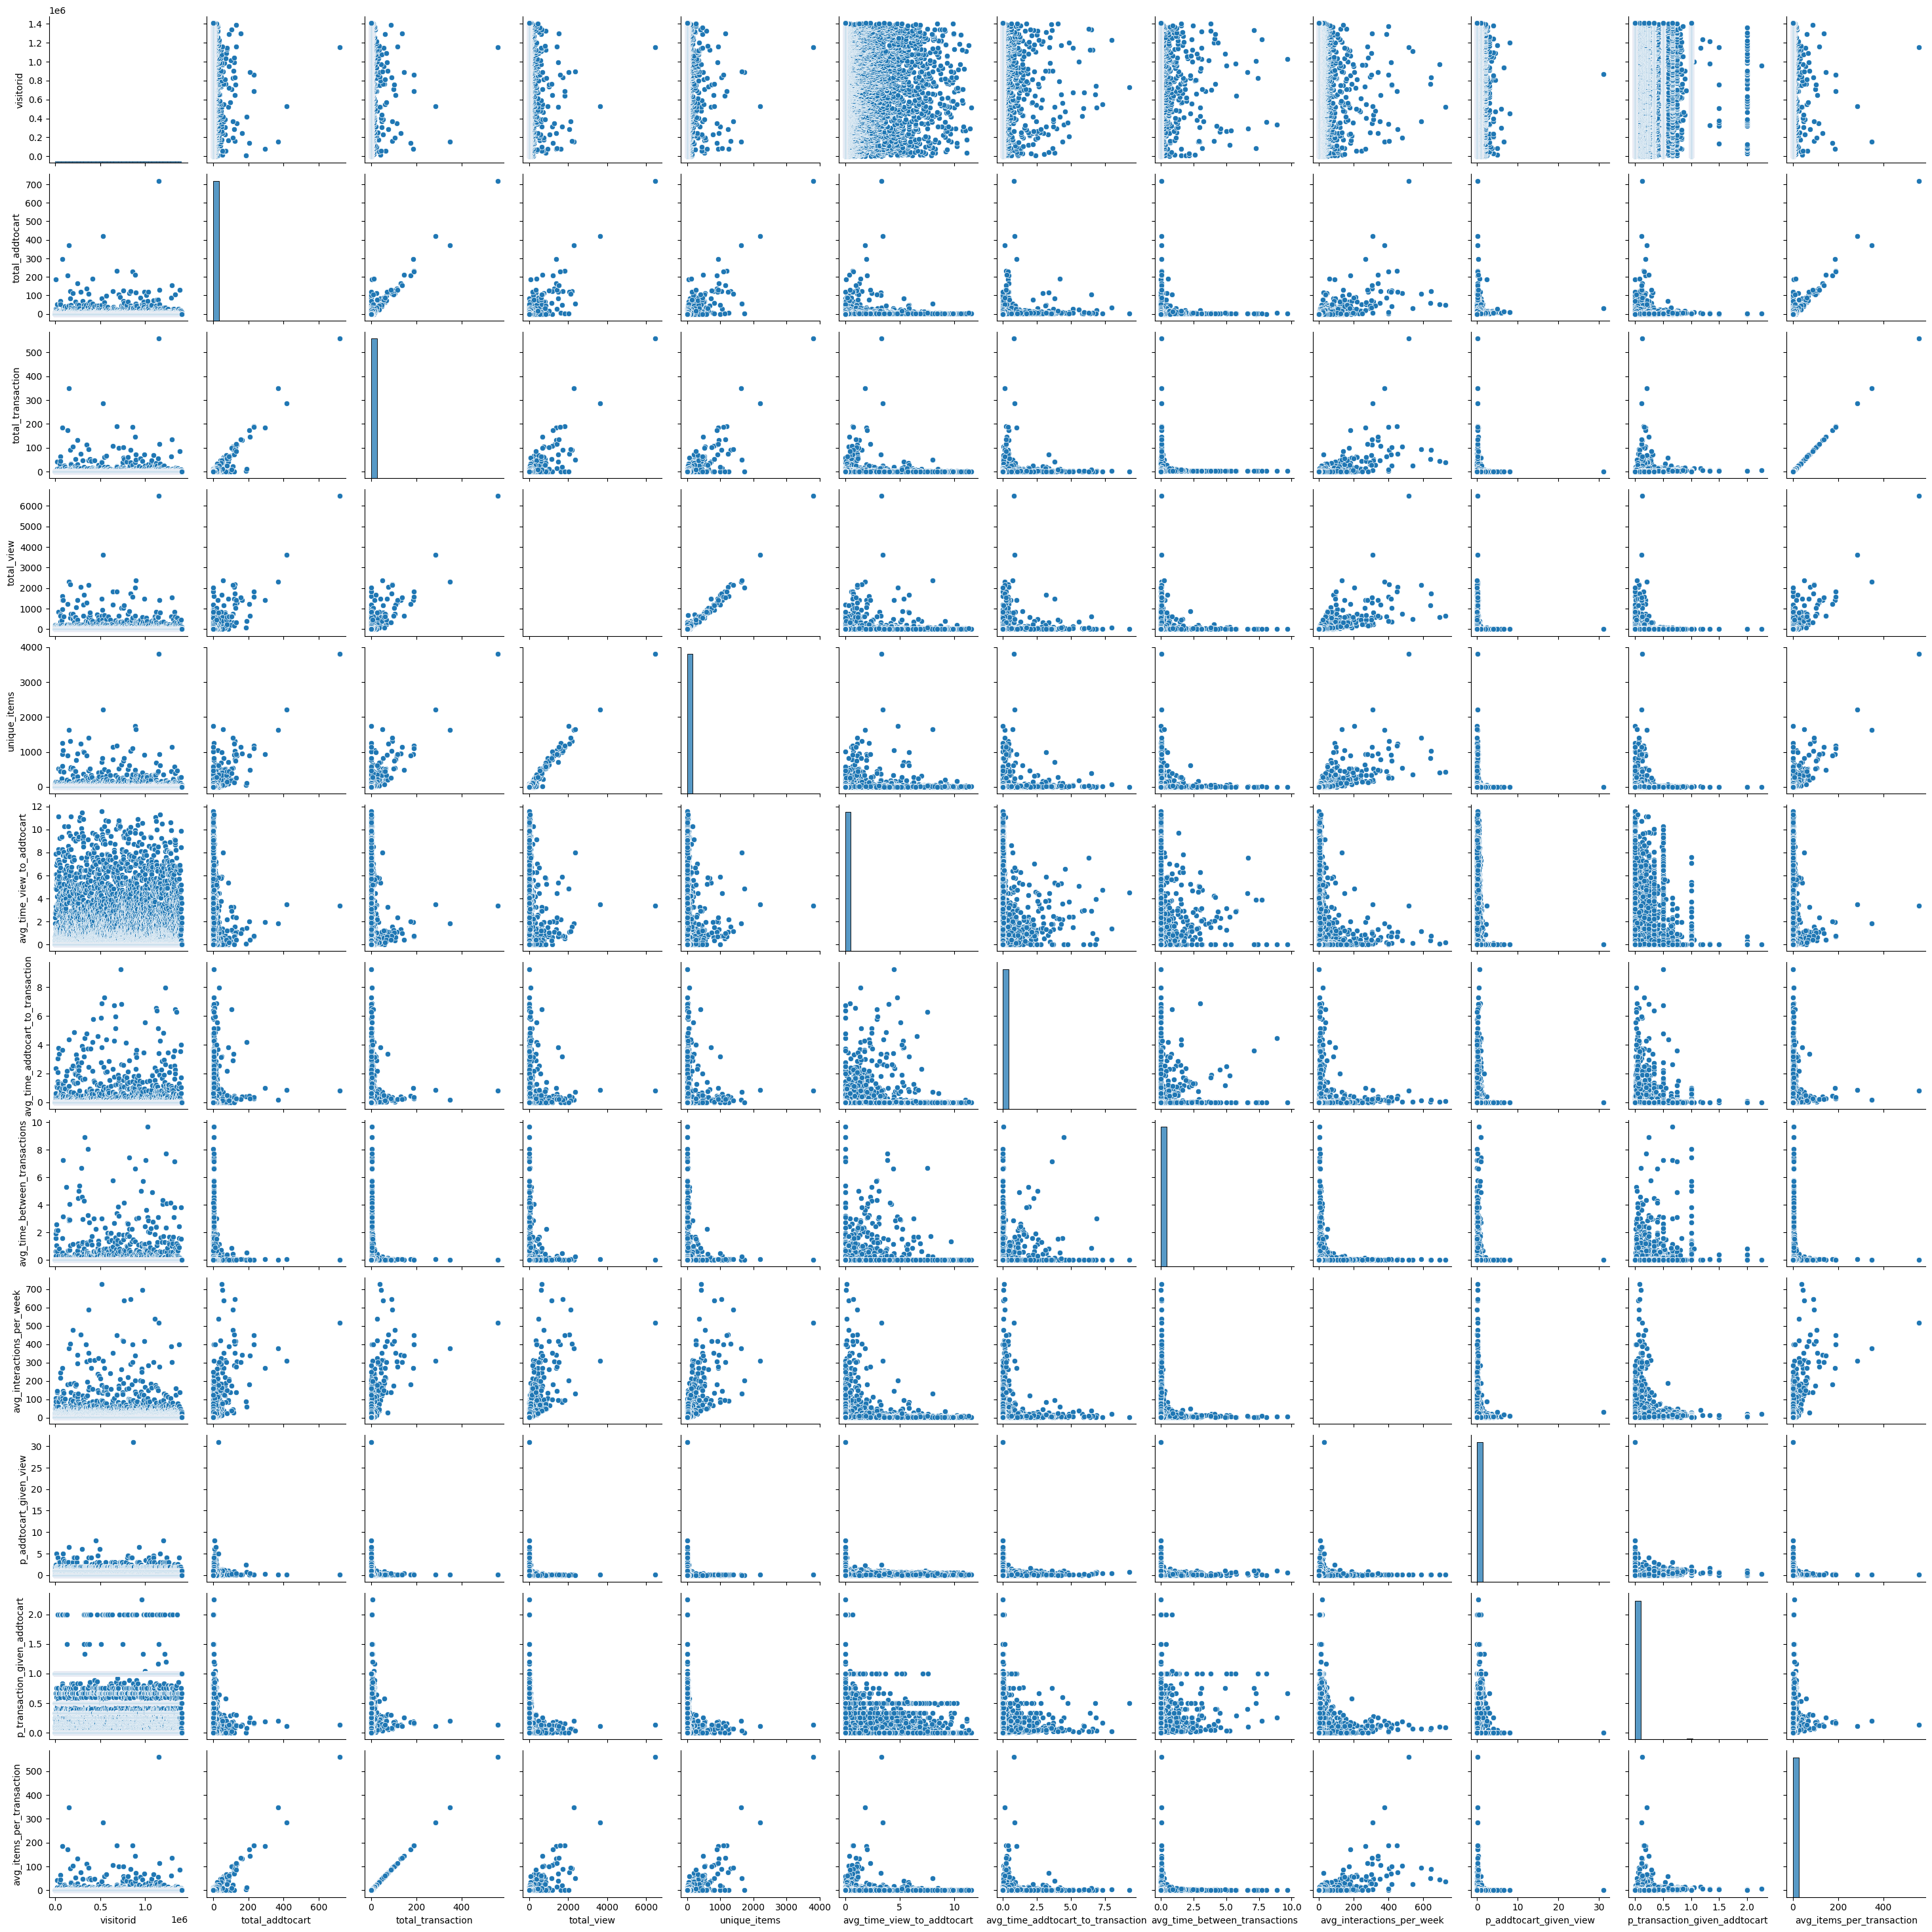

In [ ]:
sns.pairplot(users)
plt.show()

**Pairwise Scatter Plot Matrix of Features**<br>
This scatter plot matrix visualizes the pairwise relationships between multiple numerical features in the dataset. Some feature pairs exhibit clear linear or clustered patterns, while others show weak or no correlation, indicating varying degrees of association across different attributes

In [ ]:
users.head()

,visitorid,total_addtocart,total_transaction,total_view,unique_items,avg_time_view_to_addtocart,avg_time_addtocart_to_transaction,avg_time_between_transactions,avg_interactions_per_week,p_addtocart_given_view,p_transaction_given_addtocart,avg_items_per_transaction
0,0,0,0,3,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0,0,8,4,0.0,0.0,0.0,8.0,0.0,0.0,0.0
3,3,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
users.shape[0]

1407580

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407580 entries, 0 to 1407579
Data columns (total 12 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   visitorid                          1407580 non-null  int64  
 1   total_addtocart                    1407580 non-null  int64  
 2   total_transaction                  1407580 non-null  int64  
 3   total_view                         1407580 non-null  int64  
 4   unique_items                       1407580 non-null  int64  
 5   avg_time_view_to_addtocart         1407580 non-null  float64
 6   avg_time_addtocart_to_transaction  1407580 non-null  float64
 7   avg_time_between_transactions      1407580 non-null  float64
 8   avg_interactions_per_week          1407580 non-null  float64
 9   p_addtocart_given_view             1407580 non-null  float64
 10  p_transaction_given_addtocart      1407580 non-null  float64
 11  avg_items_per_transactio

In [ ]:
print("Summary Statistics:")
print(users.describe())

Summary Statistics:
          visitorid  total_addtocart  total_transaction    total_view  \
count  1.407580e+06     1.407580e+06       1.407580e+06  1.407580e+06   
mean   7.037895e+05     4.925617e-02       1.595433e-02  1.892832e+00   
std    4.063335e+05     1.165057e+00       8.260909e-01  1.099370e+01   
min    0.000000e+00     0.000000e+00       0.000000e+00  0.000000e+00   
25%    3.518948e+05     0.000000e+00       0.000000e+00  1.000000e+00   
50%    7.037895e+05     0.000000e+00       0.000000e+00  1.000000e+00   
75%    1.055684e+06     0.000000e+00       0.000000e+00  2.000000e+00   
max    1.407579e+06     7.190000e+02       5.590000e+02  6.479000e+03   

       unique_items  avg_time_view_to_addtocart  \
count  1.407580e+06                1.407580e+06   
mean   1.524019e+00                6.558580e-03   
std    7.143724e+00                1.673094e-01   
min    1.000000e+00                0.000000e+00   
25%    1.000000e+00                0.000000e+00   
50%    1.000000e

Summary statistics of the `users` dataframe

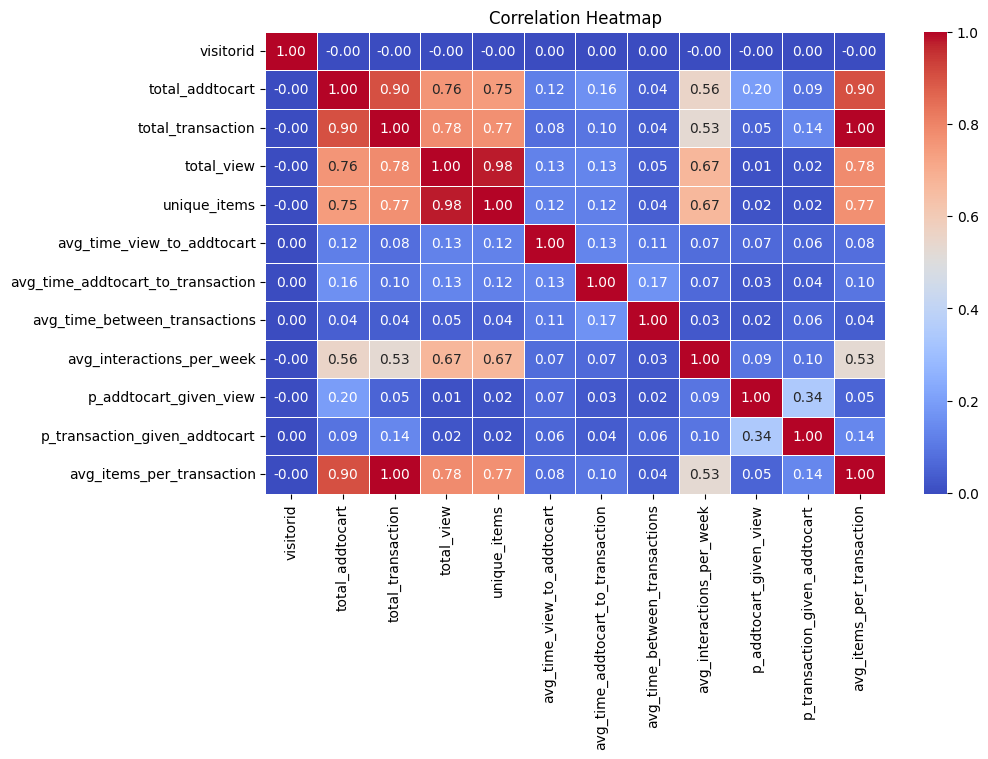

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(users.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap of User Interaction Metrics**<br>
This heatmap visualizes the correlation between various user interaction metrics. Strong correlations are observed between total transactions, total add-to-cart actions, and total views, indicating that users who view more products are more likely to engage in transactions. Conversely, weaker correlations between time-based metrics and purchase likelihood suggest that time delays between interactions may not significantly impact purchasing behavior.

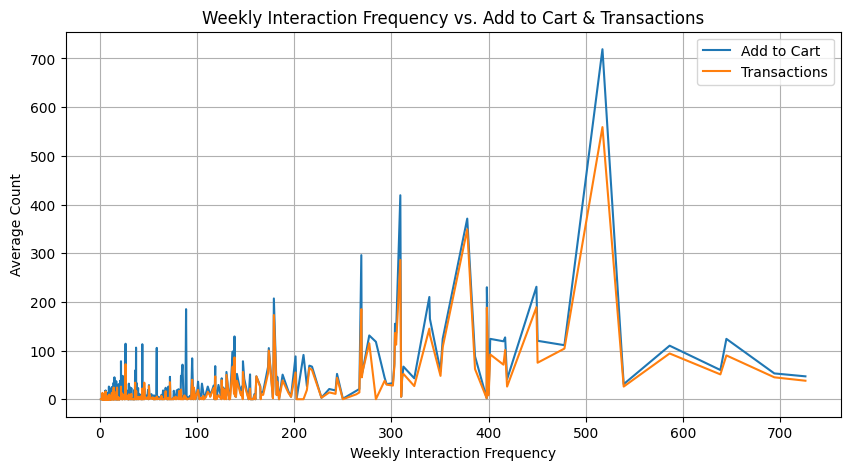

In [ ]:
users.groupby('avg_interactions_per_week')[['total_addtocart', 'total_transaction']].mean().plot(figsize=(10, 5))
plt.title("Weekly Interaction Frequency vs. Add to Cart & Transactions")
plt.xlabel("Weekly Interaction Frequency")
plt.ylabel("Average Count")
plt.legend(["Add to Cart", "Transactions"])
plt.grid(True)
plt.show()

**Relationship Between Weekly Interaction Frequency, Add to Cart, and Transactions**<br>
This line plot illustrates the relationship between weekly interaction frequency and two key shopping behaviors: adding items to the cart and completing transactions. As user interactions increase, both add-to-cart and transaction counts exhibit a similar trend, with sharp peaks indicating bursts of purchasing activity. However, the "Add to Cart" count consistently exceeds transaction counts, suggesting that while users engage with products, a portion of them do not proceed to checkout.

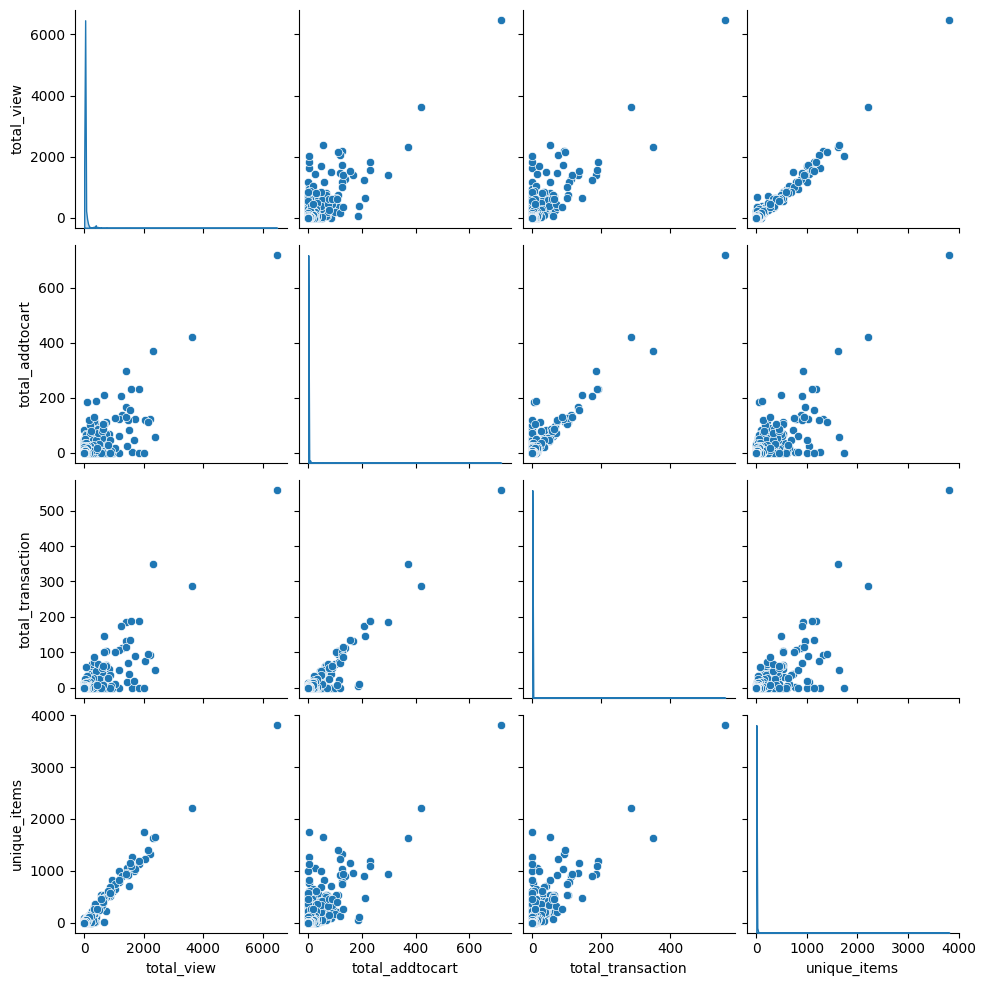

In [ ]:
sns.pairplot(users[['total_view', 'total_addtocart', 'total_transaction', 'unique_items']], diag_kind="kde")
plt.show()

/var/tmp/ipykernel_13356/298050023.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


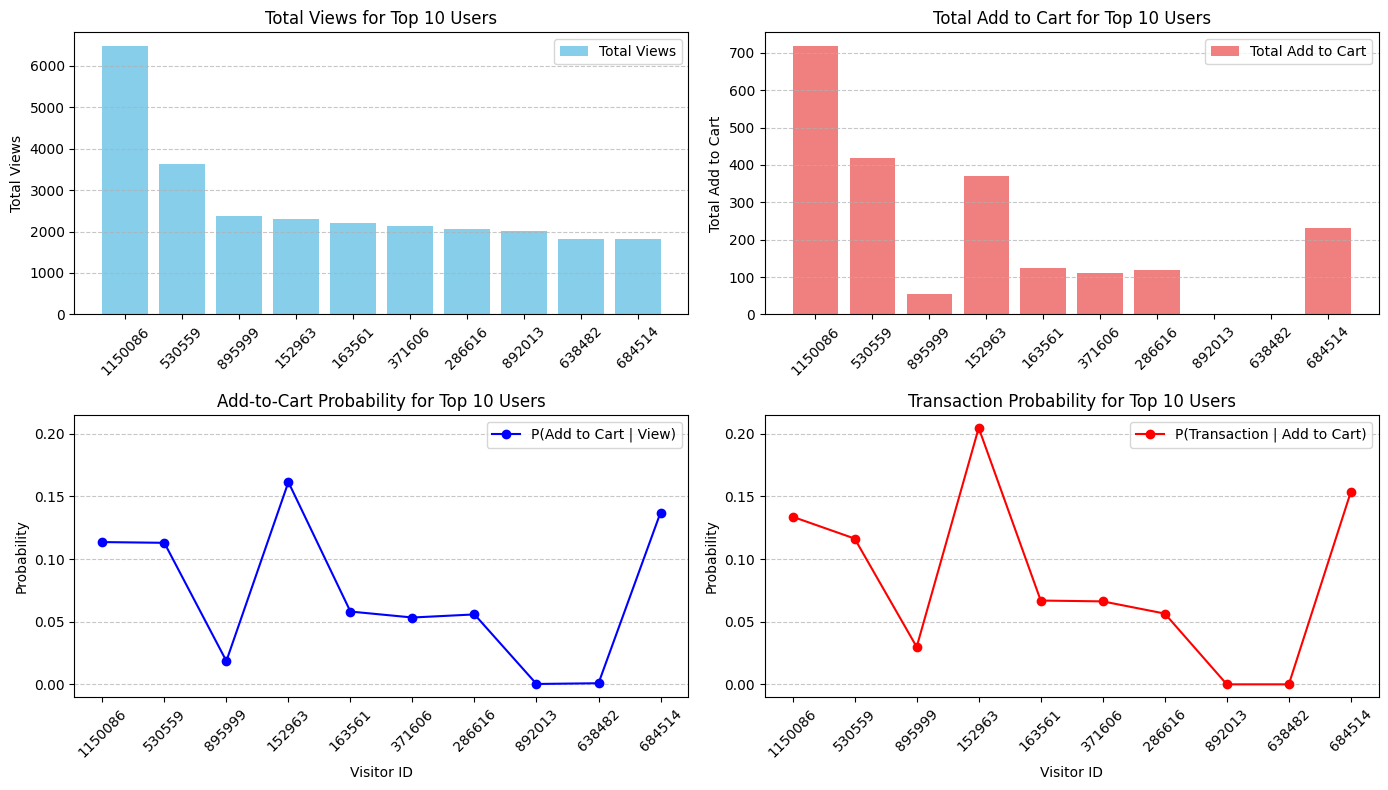

In [ ]:
# Reduce memory usage by sampling fewer users
top_10_users_sample = users.nlargest(10, 'total_view')[['visitorid', 'total_view', 'p_addtocart_given_view', 'total_addtocart', 'p_transaction_given_addtocart']]

# Sort the dataset for better visualization
top_10_users_sample = top_10_users_sample.sort_values(by='total_view', ascending=False)

# Create subplots (2 rows, 2 columns) to compare total views vs. add-to-cart and transactions
# Create subplots (2 rows, 2 columns) to compare total views vs. add-to-cart and transactions
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), sharex=False)

# --- Left Column (Total Views & Add to Cart Probability) ---
# Bar plot for Total Views (Top Users)
axes[0, 0].bar(top_10_users_sample['visitorid'].astype(str), top_10_users_sample['total_view'], color='skyblue', label="Total Views")
axes[0, 0].set_ylabel("Total Views")
axes[0, 0].set_title("Total Views for Top 10 Users")
axes[0, 0].legend()
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Line plot for Add-to-Cart Probability (Top Users)
axes[1, 0].plot(top_10_users_sample['visitorid'].astype(str), top_10_users_sample['p_addtocart_given_view'], marker='o', linestyle='-', color='blue', label="P(Add to Cart | View)")
axes[1, 0].set_xlabel("Visitor ID")
axes[1, 0].set_ylabel("Probability")
axes[1, 0].set_title("Add-to-Cart Probability for Top 10 Users")
axes[1, 0].legend()
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Right Column (Total Add to Cart & Transaction Probability) ---
# Bar plot for Total Add to Cart (Top Users)
axes[0, 1].bar(top_10_users_sample['visitorid'].astype(str), top_10_users_sample['total_addtocart'], color='lightcoral', label="Total Add to Cart")
axes[0, 1].set_ylabel("Total Add to Cart")
axes[0, 1].set_title("Total Add to Cart for Top 10 Users")
axes[0, 1].legend()
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Line plot for Transaction Probability after Add to Cart (Top Users) with same scale as Add-to-Cart Probability
axes[1, 1].plot(top_10_users_sample['visitorid'].astype(str), top_10_users_sample['p_transaction_given_addtocart'], marker='o', linestyle='-', color='red', label="P(Transaction | Add to Cart)")
axes[1, 1].set_xlabel("Visitor ID")
axes[1, 1].set_ylabel("Probability")
axes[1, 1].set_title("Transaction Probability for Top 10 Users")
axes[1, 1].legend()
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Ensure both probability plots have the same scale
y_min = min(axes[1, 0].get_ylim()[0], axes[1, 1].get_ylim()[0])
y_max = max(axes[1, 0].get_ylim()[1], axes[1, 1].get_ylim()[1])
axes[1, 0].set_ylim(y_min, y_max)
axes[1, 1].set_ylim(y_min, y_max)

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

**Engagement and Conversion Behavior of Top 10 Users**<br>
The set of visualizations compares the total views, add-to-cart actions, and conversion probabilities for the top 10 most engaged users. The top-left and top-right bar charts show that while some users have high product views, their add-to-cart actions vary significantly, indicating differences in browsing versus purchasing behavior. The bottom two line plots reveal that the probability of adding an item to the cart given a view and the probability of completing a transaction given an add-to-cart action fluctuate across users, suggesting that not all highly engaged users follow the same purchase patterns.